In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.utils import to_categorical
import os
import matplotlib.pyplot as plt
import numpy as np
#import cv2 as cv
import tensorflow as tf
from concurrent.futures import ThreadPoolExecutor

In [3]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [67]:
import os
import tensorflow as tf

# Define a function to load data from a directory
def get_from_dir(dir):
    global path
    dir = os.path.join(path, dir)
    return tf.keras.utils.image_dataset_from_directory(
           dir,
           labels='inferred',
           color_mode="rgb",
           seed=42,
           batch_size=32,
           image_size=(128, 128))

# Define paths as raw strings to avoid issues with backslashes
train = r"C:\Users\Kruthik S\Downloads\Dataset (1)\deep_lean.ipynb\train"
test = r"C:\Users\Kruthik S\Downloads\Dataset (1)\deep_lean.ipynb\test"

# Assign path and load datasets
path = r"C:\Users\Kruthik S\Downloads\Dataset (1)\deep_lean.ipynb"
train_dataset = get_from_dir("train")
test_dataset = get_from_dir("test")




Found 2019 files belonging to 2 classes.
Found 2024 files belonging to 2 classes.


Found 2019 files belonging to 2 classes.
Class Names: ['Fake', 'Real']


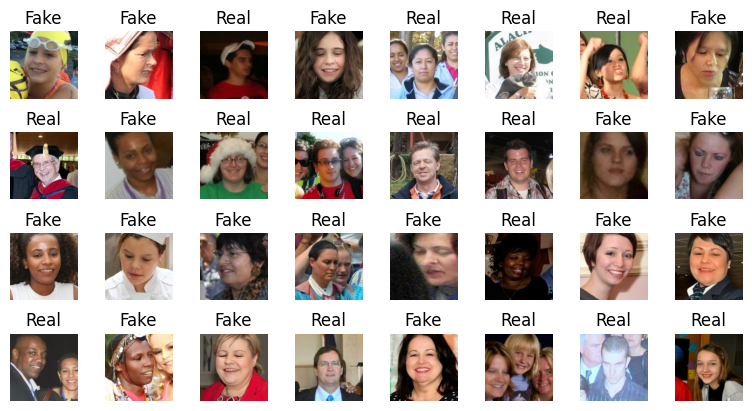

In [68]:
# Import necessary libraries
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf

# Load the dataset from the correct directory using a raw string or forward slashes
train = tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\Kruthik S\Downloads\Dataset (1)\deep_lean.ipynb\train",  # Replace with your actual train dataset path
    labels='inferred',
    batch_size=32,
    image_size=(128, 128)  # Adjust size as needed
)

# Fetch class names from the dataset
class_names = train.class_names
print(f"Class Names: {class_names}")

# Set up the grid for plotting images
n_rows = 4
n_cols = 8  # Adjusted to plot a batch of 32 images
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))

# Take a batch of data
data = list(train.take(1))[0]  # Take one batch of 32 images

# Loop to plot the images
for i in range(n_rows * n_cols):
    # Ensure we're within the bounds of available images
    if i >= len(data[0]):
        break  # Stop if we exceed available images

    # Get the image and label
    single_image = data[0][i]  # Get the image
    label_index = data[1][i].numpy()  # Get the corresponding label

    # Plot the image
    plt.subplot(n_rows, n_cols, i + 1)
    plt.imshow(single_image.numpy().astype("uint8"))  # Convert image to uint8 for display
    plt.axis('off')  # Turn off the axis
    plt.title(class_names[label_index], fontsize=12)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()




In [69]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Correct paths using raw strings
train_dir = r"C:\Users\Kruthik S\Downloads\Dataset (1)\deep_lean.ipynb\train"
test_dir = r"C:\Users\Kruthik S\Downloads\Dataset (1)\deep_lean.ipynb\test"


# Function to load dataset from directory
def get_from_dir(dir):
    return tf.keras.utils.image_dataset_from_directory(
        dir,
        labels='inferred',
        color_mode="rgb",
        seed=42,
        batch_size=32,
        image_size=(128, 128))

# Load datasets
train = get_from_dir(train_dir)
test = get_from_dir(test_dir)


# Check the class names from the dataset
class_names = train.class_names
print("Class Names:", class_names)


Found 2019 files belonging to 2 classes.
Found 2024 files belonging to 2 classes.
Class Names: ['Fake', 'Real']


In [1]:
model = models.Sequential()


model.add(layers.Conv2D(32,(3,3),activation="relu", padding='same',input_shape=(128,128,3)))
model.add(layers.Conv2D(32,(3,3),activation="relu", padding='same'))
model.add(layers.MaxPooling2D((2,2), strides=(2, 2)))


model.add(layers.Conv2D(64,(3,3),activation="relu", padding='same'))
model.add(layers.Conv2D(64,(3,3),activation="relu", padding='same'))
model.add(layers.MaxPooling2D((2,2), strides=(2, 2)))


model.add(layers.Conv2D(128,(3,3),activation="relu", padding='same'))
model.add(layers.Conv2D(128,(3,3),activation="relu", padding='same'))
model.add(layers.MaxPooling2D((2,2), strides=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128,activation="relu"))
model.add(layers.Dense(256,activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))

model.summary()


NameError: name 'models' is not defined

In [ ]:
Model: "sequential"

In [73]:
model.compile('adam',loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [78]:
from tensorflow.keras.callbacks import EarlyStopping

# Create EarlyStopping callback
early_stopping_cb = EarlyStopping(patience=5, restore_best_weights=True)

# Train the model using the training set only
history = model.fit(
    train,  # Your training dataset
    epochs=10,  # Set the number of epochs
    batch_size=32,  # Batch size (if you are not using image_dataset_from_directory)
    callbacks=[early_stopping_cb]  # Early stopping callback
)



Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.9751 - loss: 0.0725
Epoch 2/10


c:\Users\Kruthik S\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.9544 - loss: 0.1167
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.9734 - loss: 0.0699
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.9860 - loss: 0.0423
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - accuracy: 0.9408 - loss: 0.1559
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.9681 - loss: 0.0895
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.9860 - loss: 0.0337
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.9837 - loss: 0.0388
Epoch 9/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.9839 - loss: 0.0573
Epoch 10/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.9851 - loss: 0.0375


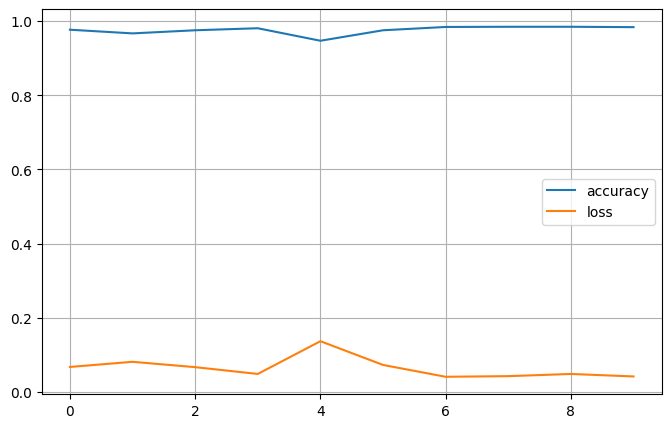

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming history is available from model.fit()
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()


In [80]:
model.evaluate(test)

64/64 ━━━━━━━━━━━━━━━━━━━━ 12s 178ms/step - accuracy: 0.7542 - loss: 1.6303


[1.492474913597107, 0.7628458738327026]

In [60]:
model.save("modelo_detector_caras.keras")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 825ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

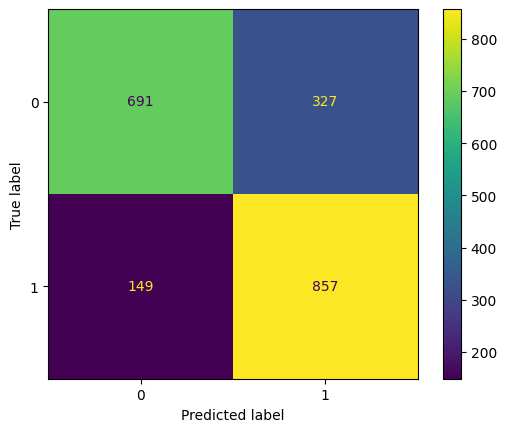

In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


true_labels = []
predictions = []

for images, labels in test:
    true_labels.extend(labels.numpy())
    batch_predictions = model.predict(images) >= 0.5
    predictions.extend(batch_predictions.astype(int).flatten())

true_labels = np.array(true_labels)
predictions = np.array(predictions)

cm = confusion_matrix(true_labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

64/64 ━━━━━━━━━━━━━━━━━━━━ 18s 270ms/step


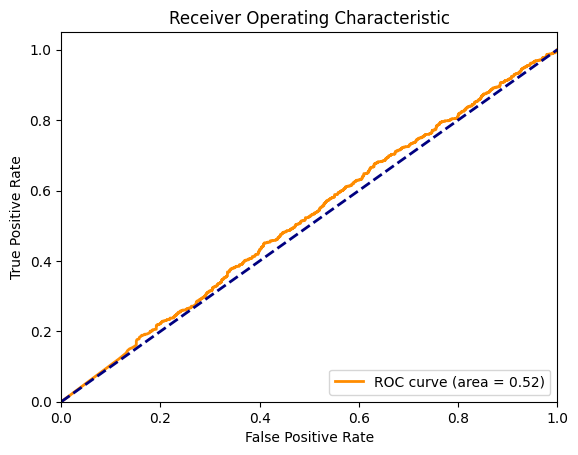

In [64]:
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Extract y_true from your test data
# Assuming test is a tf.data.Dataset
y_true = np.concatenate([y for x, y in test], axis=0)

# Get predicted probabilities for the test data
y_pred_prob = model.predict(test)  # Get the predicted probabilities

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
